In [12]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pywt
import pandas as pd

print(pywt.wavelist(kind = 'discrete'))

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'haar', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']


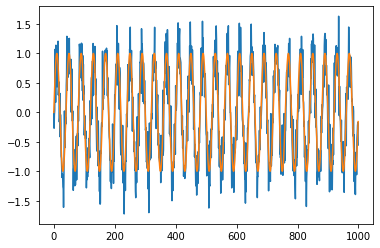

In [4]:
Size = 1000
T = 40
time = np.arange(0,Size,1)

sst = np.sin(2 * np.pi * time / T) 
sst_noise = sst + np.random.normal(0, 0.3, size = Size)


plt.figure('sst_noise')
plt.plot(time, sst_noise)
plt.plot(time, sst)

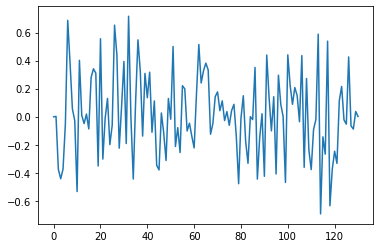

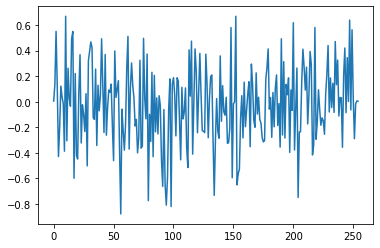

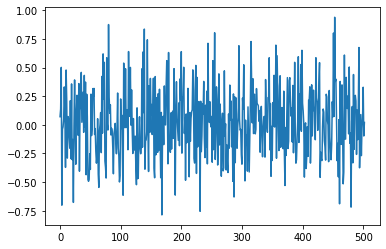

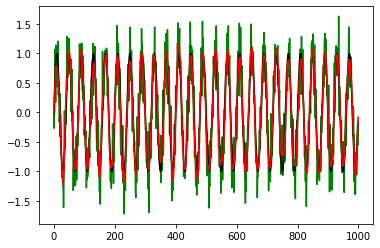

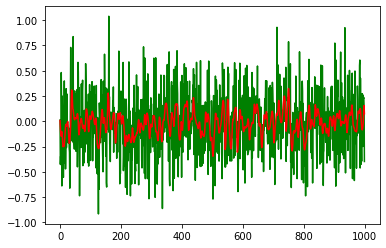

In [20]:
wavelet = 'db4'


coeffs_filter = pywt.wavedec(sst_noise, wavelet, mode = 'zero', level =3)

# print(coeffs_filter)


for i in range(1, len(coeffs_filter)):
    plt.figure('Coeffs' + str(i))
    plt.plot(coeffs_filter[i])
    for j in range(0,len(coeffs_filter[i])):
        coeffs_filter[i][j] = 0 

    
sst_idwt = pywt.waverec(coeffs_filter,wavelet, mode = 'zero')

plt.figure("all sst")
plt.plot(sst_noise, color = 'green')
plt.plot(sst, color = 'black')
plt.plot(sst_idwt, color = 'red')


plt.figure("diff sst")
plt.plot(sst_noise - sst, color = 'green')
plt.plot(sst_idwt - sst, color = 'red')